# **Explica las predicciones de tu modelo con valores de Shapley**

En este notebook vamos a introducir la **librería SHAP** y los **valores de Shapley** en Python. Estos conceptos se utilizan para explicar las predicciones de un modelo y obtener información útil sobre cómo se ha construido y cómo está tomando decisiones.

Vamos a ello.


<a class="anchor" id="0.1"></a>
# **Tabla de Contenidos**

1. [Machine Learning interpretables](#1)
2. [Introducción a la librería SHAP y los valores de Shapley (SHAP Values)](#2)
  - 2.1 [Valores de Shapley](#2.1)
  - 2.2 [SHAP Library](#2.2)
3. [Implementación en Python para el desarrollo de un modelo](#3)
4. [SHAP Explanation Force Plots](#4)
5. [SHAP Feature Importance](#5)
6. [SHAP Summary Plot](#6)
7. [SHAP Dependence Plot](#7)
8. [References](#8)
  


# **1. Machine Learning Interpretable** <a class="anchor" id="1"></a>

[Tabla de Contenidos](#0.1)

- El aprendizaje automático (ML) tiene un gran potencial para mejorar productos, procesos y servicios. Se proporciona un conjunto de datos como entrada, y los algoritmos generan la salida deseada. Sin embargo, los algoritmos no explican sus predicciones, lo que representa una barrera para la adopción del ML. En este caso, los modelos de aprendizaje automático interpretables vienen al rescate.

- Tim Miller, en su obra *“Explanation in Artificial Intelligence: Insights from the Social Sciences”*, define la interpretabilidad como:

    **“el grado en que un humano puede entender la causa de una decisión en un modelo”**. Esto significa que la interpretabilidad se alcanza en algún nivel o "grado".
       
- En el contexto del ML, la interpretabilidad nos ayuda a entender cómo un modelo ha tomado una decisión en particular.

- Nuestro modelo debe ser interpretable y además exhibir los siguientes atributos:

  - 1 **Equidad** - Asegurar que las predicciones no tengan sesgos y no discriminen implícita o explícitamente a grupos minoritarios. Un modelo interpretable puede explicar por qué decidió que una persona no debería recibir un préstamo, lo que facilita a un humano juzgar si la decisión se basa en un sesgo demográfico aprendido (por ejemplo, racial).
  - 2 **Privacidad** - Garantizar que la información sensible en los datos esté protegida.
  - 3 **Confiabilidad o Robustez** - Asegurar que pequeños cambios en los datos de entrada no provoquen grandes cambios en la predicción.
  - 4 **Causalidad** - Verificar que solo se capten relaciones causales.
  - 5 **Confianza** - Es más fácil para los humanos confiar en un sistema que explica sus decisiones en comparación con una caja negra.

# **Métodos más comunes para la explicabilidad**

- Estos métodos no dependen de ninguna particularidad del modelo. La ventaja de estos métodos radica en su flexibilidad. Los desarrolladores de aprendizaje automático son libres de usar cualquier modelo que prefieran. Los métodos de interpretación pueden aplicarse a cualquier modelo. Estos métodos son los siguientes:

  1. Valores de Shapley (explicados en este Notebook)
  2. LIME
  3. Importancia de las características
  4. Interacción de características
  5. Modelos sustitutos

# **2. Introducción a la librería SHAP y los valores de Shapley (SHAP Values)** <a class="anchor" id="2"></a>

[Tabla de Contenidos](#0.1)

- Python ofrece una biblioteca llamada [SHAP (SHapley Additive exPlanations)](https://christophm.github.io/interpretable-ml-book/shap.html) desarrollada por Lundberg y Lee. Esta se utiliza para explicar predicciones individuales de modelos. SHAP se basa en los [valores de Shapley](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley), que son óptimos desde una perspectiva teórica de juegos.

- Primero, hablemos sobre los valores de Shapley.

## **2.1 Valores de Shapley** <a class="anchor" id="2.1"></a>

[Tabla de Contenidos](#0.1)

- En el contexto de [Aprendizaje Automático Interpretable - Valores de Shapley](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley), los **Valores de Shapley** se pueden definir como:

    **Una predicción puede explicarse asumiendo que cada valor de característica de la instancia es un “jugador” en un juego donde la predicción es la recompensa. Los valores de Shapley, un método de la teoría de juegos coalicionales, nos indican cómo distribuir de manera justa la “recompensa” entre las características.**

- Para una discusión más detallada sobre los valores de Shapley, consulta el capítulo - [Valores de Shapley](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley).

## **2.2 Library SHAP** <a class="anchor" id="2.2"></a>

[Tabla de Contenidos](#0.1)

- La Librería SHAP en Python tiene funciones integradas para utilizar los valores de Shapley en la interpretación de modelos de ML. Cuenta con funciones optimizadas para interpretar modelos basados en árboles y un explicador independiente del modelo para interpretar cualquier modelo de caja negra cuyas predicciones sean conocidas.

- Lundberg y Lee implementaron SHAP en el paquete de Python [SHAP](https://github.com/slundberg/shap). Esta implementación funciona para modelos basados en árboles en la librería de ML **scikit-learn para Python**.

- Los autores de SHAP propusieron **KernelSHAP**, un enfoque alternativo de estimación basado en kernels para los valores de Shapley, inspirado en [modelos sustitutos locales](https://christophm.github.io/interpretable-ml-book/lime.html#lime).

- También propusieron **TreeSHAP**, un enfoque eficiente de estimación para modelos basados en árboles.

- [SHAP](https://github.com/slundberg/shap) incluye muchos métodos de interpretación global basados en agregaciones de valores de Shapley. Los demostraremos en este kernel.

- Para una discusión más detallada sobre [SHAP](https://github.com/slundberg/shap), consulta el capítulo - [SHAP](https://christophm.github.io/interpretable-ml-book/shap.html).

- Ahora, pasemos a la implementación.

# **3. Implementación en Python para el desarrollo de un modelo** <a class="anchor" id="3"></a>

[Tabla de Contenidos](#0.1)

## **3.1 Set-Up Inicial** <a class="anchor" id="3.1"></a>

[Tabla de Contenidos](#0.1)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **3.2 Leer los datos** <a class="anchor" id="3.2"></a>

[Tabla de Contenidos](#0.1)

In [3]:
# Load and preview data
df = pd.read_csv('housing (1).csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- La variable objetivo (target) es `median_house_value`.

## **3.3 Resumen de los datos** <a class="anchor" id="3.3"></a>

[Tabla de Contenidos](#0.1)

In [4]:
# View summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Podemos ver que `total_bedrooms` tiene valores faltantes (NaN).

## **3.4 Tratamiento de valores faltantes** <a class="anchor" id="3.4"></a>

[Tabla de Contenidos](#0.1)

<Axes: xlabel='total_bedrooms'>

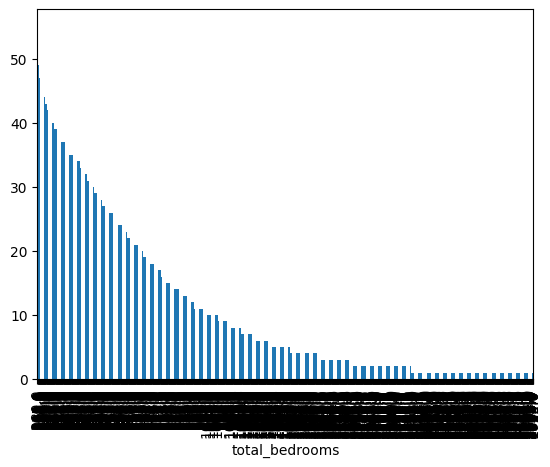

In [5]:
# Plot the distribution of total bedrooms
df['total_bedrooms'].value_counts().plot.bar()

- La distribución de `total_bedrooms` es asimétrica. Por lo tanto, vamos a rellenar los valores faltantes utilizando la mediana.

In [6]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


No hay faltantes.

## **3.5 Feature Vector and Target Variable** <a class="anchor" id="3.5"></a>

[Tabla de Contenidos](#0.1)

In [8]:
# Declare feature vector and target variable
X = df[['longitude','latitude','housing_median_age','total_rooms',
        'total_bedrooms','population','households','median_income']]
y = df['median_house_value']

## **3.6 Train-Test Split** <a class="anchor" id="3.6"></a>

[Tabla de Contenidos](#0.1)

In [9]:
# Split the data into train and test data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## **3.7 Build the model** <a class="anchor" id="3.7"></a>

[Tabla de Contenidos](#0.1)

In [10]:
# Build the model with Random Forest Classifier :
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

## **3.8 Generate Predictions** <a class="anchor" id="3.8"></a>

[Tabla de Contenidos](#0.1)

In [11]:
y_pred = model.predict(X_test)

## **3.9 Evaluating Performance** <a class="anchor" id="3.9"></a>

[Tabla de Contenidos](#0.1)

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

68126.3666645792

## **3.10 Guardar y cargar el modelo con `pickle`** <a class="anchor" id="3.10"></a>

[Tabla de Contenidos](#0.1)  

Una vez que tenemos el modelo entrenado (`model`), suele ser útil **guardarlo en disco** para poder reutilizarlo más adelante sin tener que volver a entrenarlo.

En Python, una forma sencilla de hacerlo es usando el módulo estándar `pickle`, que permite **serializar** (guardar) un objeto en un archivo binario y posteriormente **deserializarlo** (cargarlo) en otra sesión de trabajo.

Pasos básicos:

1. Entrenamos el modelo normalmente.
2. Guardamos el modelo entrenado en un archivo `.pkl` usando `pickle.dump`.
3. Más adelante, en otra sesión o notebook, cargamos ese archivo con `pickle.load` y volvemos a tener el mismo modelo listo para predecir.

A continuación se muestra un ejemplo práctico.


In [13]:
import pickle

# Guardar el modelo entrenado en un archivo .pkl
with open("modelo_random_forest.pkl", "wb") as f:
    pickle.dump(model, f)

print("Modelo guardado como 'modelo_random_forest.pkl'")


Modelo guardado como 'modelo_random_forest.pkl'


In [14]:
import pickle

# Cargar el modelo desde el archivo .pkl
with open("modelo_random_forest.pkl", "rb") as f:
    modelo_cargado = pickle.load(f)

print("Modelo cargado correctamente")

# Ejemplo de uso: hacer predicciones con el modelo cargado
y_pred_cargado = modelo_cargado.predict(X_test)


Modelo cargado correctamente


In [15]:
mse_cargado = mean_squared_error(y_test, y_pred_cargado)**(0.5)
mse_cargado

68126.3666645792

 # **4. Gráficos de fuerza (force plots) con SHAP** <a class="anchor" id="4"></a>

[Tabla de Contenidos](#0.1)


- We will use SHAP to explain individual predictions. We can use the fast TreeSHAP estimation method instead of the slower KernelSHAP method, since a random forest is an ensemble of trees.

- Since SHAP computes Shapley values, the interpretation is the same as in the [Shapley value chapter](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley. But with the Python shap package comes a different visualization: You can visualize feature attributions such as Shapley values as “forces”. Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

- The following figure shows SHAP explanation force plots for the California Housing Prices dataset.

In [16]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

### **Interpretación**

- The above plot shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red and those pushing the prediction lower are in blue.

- So, `housing_median_age` pushes the prediction higher and `median_income`,`latitude` and `longitude` pushes the prediction lower.

- The base value of the `median_house_value` is 2.063e+5 = 206300.

- The output value is 70189.83 with `housing_median_age=52`, `median_income=1.975`, `latitude=36.73` and  `longitude=-119.8`.

- If we take many explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset as shown below.

- The following plot is interactive. Just scroll the mouse and see the different values.

In [17]:
# Número de ejemplos a mostrar
n_muestra = 200

# Nos aseguramos de no pedir más de los que hay
n_muestra = min(n_muestra, shap_values.shape[0])

# Elegimos posiciones aleatorias (0, 1, 2, ..., n-1)
sample_idx = np.random.choice(shap_values.shape[0], size=n_muestra, replace=False)

# Subconjunto de datos y shap_values alineados
X_sample = X_train.iloc[sample_idx, :]
shap_sample = shap_values[sample_idx, :]

shap.initjs()

shap.force_plot(
    explainer.expected_value,
    shap_sample,
    X_sample
)


 # **5. SHAP Feature Importance** <a class="anchor" id="5"></a>

[Tabla de Contenidos](#0.1)


- The idea behind SHAP feature importance is simple. Features with large absolute Shapley values are important. Since we want the global importance, we average the absolute Shapley values per feature across the data.

- Next, we sort the features by decreasing importance and plot them. The following figure shows the SHAP feature importance for the trained random forest model.

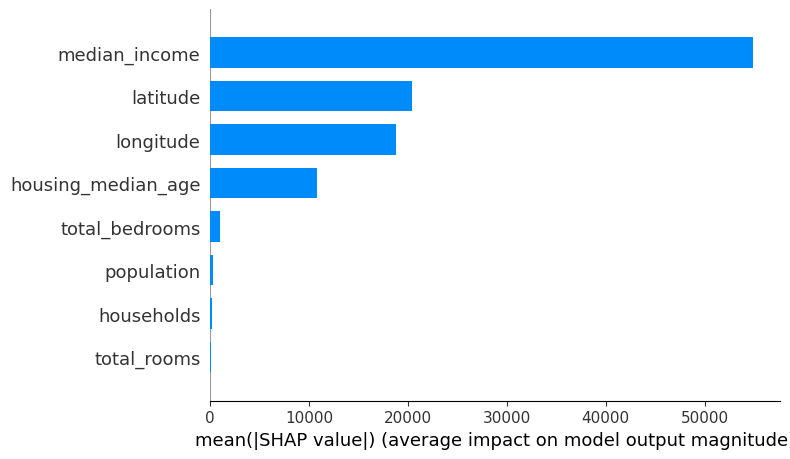

In [18]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

- The above plot shows the SHAP feature importance measured as the mean absolute Shapley values.

- The variable `median_income` was the most important feature, changing the predicted `median_house_value` on average by 56000 on x-axis.

- SHAP is based on magnitude of feature attributions. The feature importance plot is useful, but contains no information beyond the importances. For a more informative plot, we will next look at the summary plot.

# **6. SHAP Summary Plot** <a class="anchor" id="6"></a>

[Tabla de Contenidos](#0.1)


- The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.

- The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.


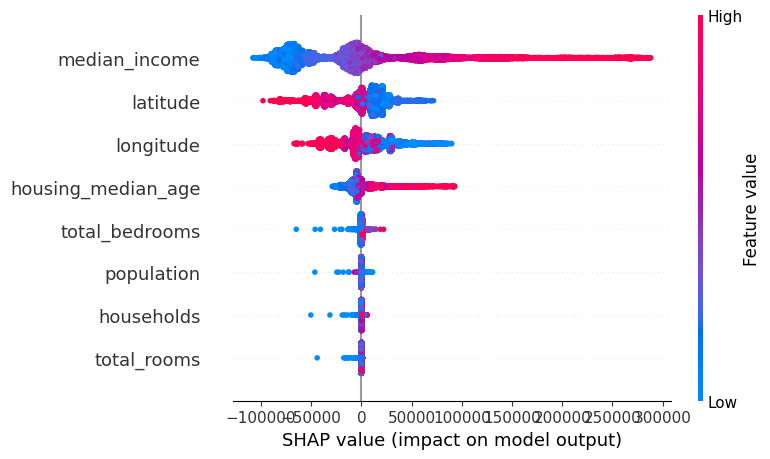

In [19]:
shap.summary_plot(shap_values, X_train)

- The above plot shows the SHAP summary plot. The summary plot combines feature importance with feature effects.

- Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

- This plot is made of all the dots in the train data. It demonstrates the following information:

  - *Feature importance*: Variables are ranked in descending order.
  - *Impact*: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
  - *Original value*: Color shows whether that variable is high (in red) or low (in blue) for that observation.
  - *Correlation*: A high level of the `median_income` has a high and positive impact on the `median_house_value`. The “high” comes from the red color, and the “positive” impact is shown on the X-axis.
  
- Similarly, `housing_median_age` is positively correlated with the target variable `median_house_value`.

# **7. SHAP Dependence Plot** <a class="anchor" id="7"></a>

[Tabla de Contenidos](#0.1)


- The SHAP Dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model  It tells whether the relationship between the target and a feature is linear, monotonic or more complex.

- We can create a dependence plot as follows:-

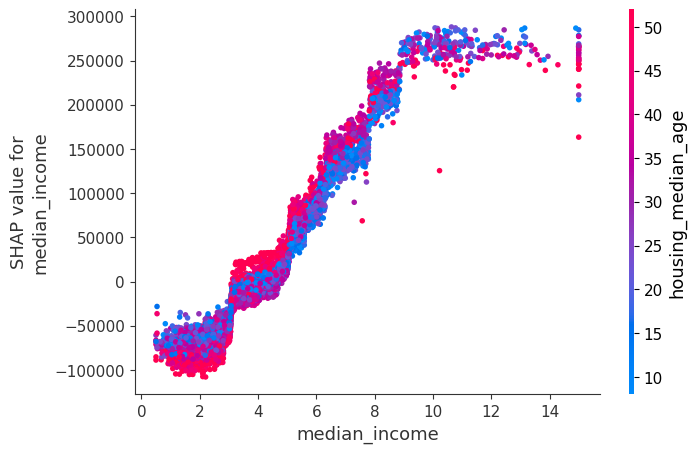

In [20]:
shap.dependence_plot('median_income', shap_values, X_train)

- The function automatically includes another variable that the chosen variable interacts most with. The above plot shows there is an approximately linear and positive trend between `median_income` and the target variable, and `median_income` interacts with `housing_median_age` frequently.

- Now, suppose we want to know `longitude` and the variable that it interacts the most.

- We can do `shap.dependence_plot(“longitude”, shap_values, X_train).

- The plot below shows there exists an approximately linear but negative relationship between `longitude` and the target variable. This negative relationship is already demonstrated in the variable importance plot. It interacts with `median_income` variable frequently.

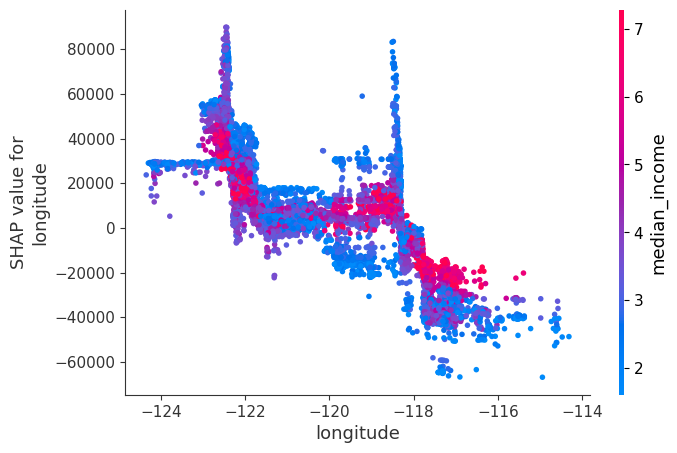

In [21]:
shap.dependence_plot('longitude', shap_values, X_train)

# **8. Referencias** <a class="anchor" id="8"></a>

[Tabla de Contenidos](#0.1)

Las ideas y conceptos de este notebook están tomados de los siguientes libros y recursos en línea:

- 1 https://github.com/slundberg/shap
- 2 https://www.kaggle.com/dansbecker/shap-values
- 3 https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values
- 4 https://christophm.github.io/interpretable-ml-book/
- 5 https://christophm.github.io/interpretable-ml-book/shapley.html
- 6 https://christophm.github.io/interpretable-ml-book/shap.html
- 7 https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d



[Go to Top](#0)